# Bayesian model-based Hyperparameter optimization
- Grid search & Random search

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

## Exploring Bayesian Optimization
https://distill.pub/2020/bayesian-optimization/

## Machine learning - Introduction to Gaussian processes, UBC
- Kij = e(-lambda|| Xi - Xj ||^2)
- https://www.youtube.com/watch?v=4vGiHC35j9s
- https://sandipanweb.wordpress.com/2020/12/08/gaussian-process-regression-with-python/

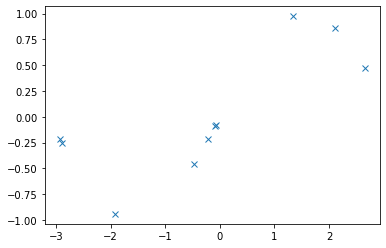

In [10]:
def generate_noisy_points(n = 10, noise_variance=1e-6):
    np.random.seed(11)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.sin(X) + np.random.randn(n, 1) * noise_variance**0.5
    return X, y

X, y = generate_noisy_points()
plt.plot(X, y, 'x'); plt.show()

In [14]:
from sklearn.gaussian_process.kernels import RBF
obs_3 = np.array([[-0.22068884], [-0.08743741], 
                  [0.3], # New data
                  [2.65083991]])
kernels = [1.0 * RBF(length_scale=1.0, 
                     length_scale_bounds=(1e-1, 10.0))]

In [19]:
kernels = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

In [20]:
kernels
kernels(obs_3, obs_3)

1**2 * RBF(length_scale=1)

array([[1.        , 0.99116132, 0.87322814, 0.01619847],
       [0.99116132, 1.        , 0.92769351, 0.02353936],
       [0.87322814, 0.92769351, 1.        , 0.06308804],
       [0.01619847, 0.02353936, 0.06308804, 1.        ]])

In [21]:
pd.DataFrame(kernels(obs_3, obs_3)) # GP squared exponential square

,0,1,2,3
0,1.000000,0.991161,0.873228,0.016198
1,0.991161,1.000000,0.927694,0.023539
2,0.873228,0.927694,1.000000,0.063088
3,0.016198,0.023539,0.063088,1.000000


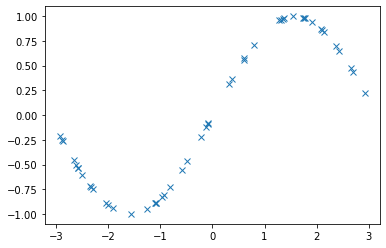

In [22]:
n_samples = 50  # number of test points
Xtest, ytest = generate_noisy_points(n_samples) # test points
plt.plot(Xtest, ytest, 'x'); plt.show()

Xtest.sort(axis=0)
noise_var=1e-6
n = 10 # n = len(Xtest), nember of f(Xtest)

In [24]:
# Xtest 인스턴스가 가까우면(동일 인스턴스) '1', 멀면(무한대) '0'
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
K = kernel(Xtest, Xtest) # kernel at test Data , Gaussian Process squared exponential square
pd.DataFrame(K).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.999194,0.998933,0.967426,0.954426,0.942726,0.942025,0.912854,0.847272,0.838625,...,0.000016,0.000008,0.000004,0.000003,0.000003,8.527404e-07,5.907621e-07,1.790498e-07,1.401481e-07,3.850802e-08
1,0.999194,1.000000,0.999982,0.976690,0.965428,0.955051,0.954423,0.927898,0.866395,0.858157,...,0.000019,0.000010,0.000004,0.000004,0.000003,1.053632e-06,7.319611e-07,2.237997e-07,1.754837e-07,4.865562e-08
2,0.998933,0.999982,1.000000,0.977956,0.966961,0.956787,0.956171,0.930056,0.869191,0.861018,...,0.000020,0.000011,0.000004,0.000004,0.000003,1.087594e-06,7.558700e-07,2.314156e-07,1.815034e-07,5.039337e-08
3,0.967426,0.976690,0.977956,1.000000,0.998845,0.996301,0.996113,0.985708,0.950582,0.945139,...,0.000051,0.000028,0.000012,0.000011,0.000010,3.216083e-06,2.267945e-06,7.271234e-07,5.755914e-07,1.675999e-07
4,0.954426,0.965428,0.966961,0.998845,1.000000,0.999278,0.999193,0.992634,0.964129,0.959418,...,0.000063,0.000035,0.000016,0.000014,0.000012,4.091058e-06,2.894550e-06,9.378159e-07,7.439397e-07,2.189797e-07


### 함수식으로 정의하면,

In [18]:
class RadialBasisKernel:
    def compute(x_1, x_2):
        return np.exp(-0.5 * np.subtract.outer(x_1, x_2) ** 2)

# toy example
x = np.array([0,1,2,2])
RadialBasisKernel.compute(x, x)
pd.DataFrame(RadialBasisKernel.compute(np.squeeze(Xtest), np.squeeze(Xtest))).head()

array([[1.        , 0.60653066, 0.13533528, 0.13533528],
       [0.60653066, 1.        , 0.60653066, 0.60653066],
       [0.13533528, 0.60653066, 1.        , 1.        ],
       [0.13533528, 0.60653066, 1.        , 1.        ]])

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,0.999194,0.998933,0.967426,0.954426,0.942726,0.942025,0.912854,0.847272,0.838625,...,0.000016,0.000008,0.000004,0.000003,0.000003,8.527404e-07,5.907621e-07,1.790498e-07,1.401481e-07,3.850802e-08
1,0.999194,1.000000,0.999982,0.976690,0.965428,0.955051,0.954423,0.927898,0.866395,0.858157,...,0.000019,0.000010,0.000004,0.000004,0.000003,1.053632e-06,7.319611e-07,2.237997e-07,1.754837e-07,4.865562e-08
2,0.998933,0.999982,1.000000,0.977956,0.966961,0.956787,0.956171,0.930056,0.869191,0.861018,...,0.000020,0.000011,0.000004,0.000004,0.000003,1.087594e-06,7.558700e-07,2.314156e-07,1.815034e-07,5.039337e-08
3,0.967426,0.976690,0.977956,1.000000,0.998845,0.996301,0.996113,0.985708,0.950582,0.945139,...,0.000051,0.000028,0.000012,0.000011,0.000010,3.216083e-06,2.267945e-06,7.271234e-07,5.755914e-07,1.675999e-07
4,0.954426,0.965428,0.966961,0.998845,1.000000,0.999278,0.999193,0.992634,0.964129,0.959418,...,0.000063,0.000035,0.000016,0.000014,0.000012,4.091058e-06,2.894550e-06,9.378159e-07,7.439397e-07,2.189797e-07


In [25]:
L = np.linalg.cholesky(K + noise_var*np.eye(n_samples))  # K = L*Lt
#f_prior = np.dot(L, np.random.normal(size=(n, n_samples))) # L* N(0,I)
f_prior = np.dot(L, np.random.normal(size=(n_samples, 10))) # L* N(0,I)
f_prior.shape

(50, 10)

## 사전 확률(Prior probability)

https://www.youtube.com/watch?v=0UgnxzxZhXg

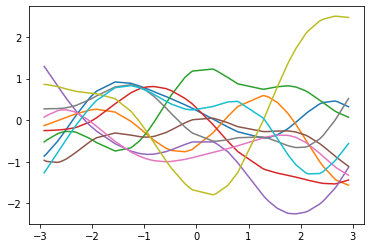

In [26]:
ax = plt.plot(Xtest, f_prior)

## 사후 확률(Posterior probability)

(50, 10)

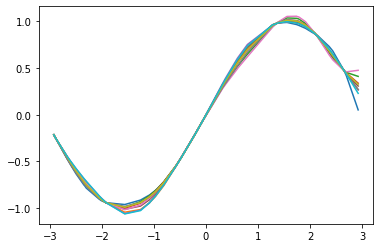

In [27]:
N, n = len(X), len(Xtest)
K = kernel(X, X)
L = np.linalg.cholesky(K + noise_var*np.eye(N))
K_ = kernel(Xtest, Xtest)
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))
L = np.linalg.cholesky(K_ + noise_var*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n_samples, 10)))
f_post.shape
ax = plt.plot(Xtest, f_post)

### Illustration of prior and posterior Gaussian process for different kernels
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html

<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

(0.0, 5.0)

(-3.0, 3.0)

Text(0.5, 1.0, 'Prior (kernel:  1**2 * RBF(length_scale=1))')

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1))

<AxesSubplot:>

(0.0, 5.0)

(-3.0, 3.0)

Text(0.5, 1.0, 'Posterior (kernel: 0.594**2 * RBF(length_scale=0.279))\n Log-Likelihood: -0.067')

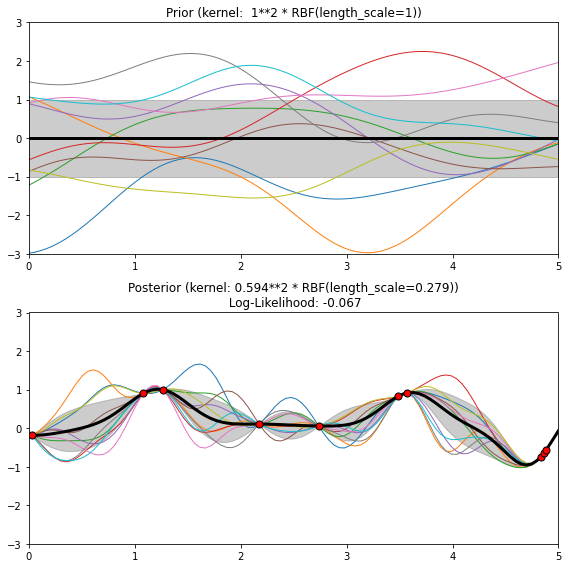

In [28]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
          ]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

## GaussianProcessRegressor 

In [29]:
from sklearn.datasets import make_friedman2 
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel 
X, y = make_friedman2(n_samples=50, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel() 
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y) 
gpr.score(X, y) 
gpr.predict(X[:2,:], return_std=True) 

0.1981656947182293

(array([572.59110669, 523.67257499]), array([296.30082871, 295.63838892]))

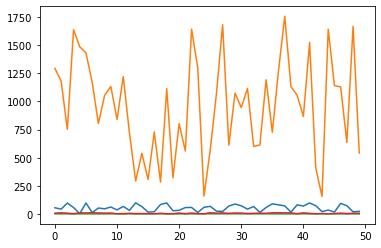

In [30]:
plt.plot(X); 

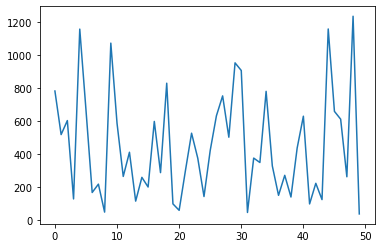

In [31]:
plt.plot(y)

In [32]:
X[:2,:]
gpr.predict(X[:2,:], return_std=True) 

array([[5.48813504e+01, 1.29401721e+03, 6.02763376e-01, 6.44883183e+00],
       [4.23654799e+01, 1.18081453e+03, 4.37587211e-01, 9.91773001e+00]])

(array([572.59110669, 523.67257499]), array([296.30082871, 295.63838892]))

Automatically created module for IPython interactive environment


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$f(x)$')

(-10.0, 20.0)

GaussianProcessRegressor(alpha=array([0.41009543, 0.48734569, 1.69193643, 2.15579205, 0.66165889,
       1.42163322, 1.8944471 , 1.94492775, 0.34227673, 0.29058006,
       0.44867279, 1.89927676, 0.35801893, 0.84843926, 2.12544188,
       1.06743051, 1.42057105, 0.66506574, 1.40778445, 1.78122568]),
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

<Figure size 432x288 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$x$')

Text(0, 0.5, '$f(x)$')

(-10.0, 20.0)

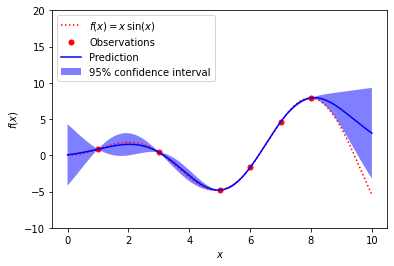

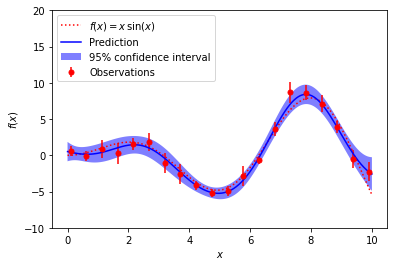

In [33]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

## Gaussian Process Classifier

In [35]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
X, y = load_iris(return_X_y=True)

kernels = [1.0 * RBF(length_scale=1.0), 1.0 * DotProduct(sigma_0=1.0)**2]
for i, kernel in enumerate(kernels):
    gpc = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, y)
    gpc.score(X, y)
    gpc.predict_proba(X[:2,:])
    print('*'*100)

0.9866666666666667

array([[0.83609851, 0.03619471, 0.12770679],
       [0.7887984 , 0.07214237, 0.13905923]])

****************************************************************************************************


0.9866666666666667

array([[0.97616544, 0.01838717, 0.00544739],
       [0.95995845, 0.03582519, 0.00421636]])

****************************************************************************************************


# End